# TASK 2 : TITANIC CLASSIFICATION

Build a predictive model to determine the lokelihood of the survival for the passenger on the
Titanic using data science technique in Python.

In [1]:
#Importing the Libraries and Loading the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
titanic = pd.read_csv(r"C:\Users\Lenovo\Downloads\Titanic_Project\titanic\train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape

(891, 12)

# Analysis data

<AxesSubplot:xlabel='Survived', ylabel='count'>

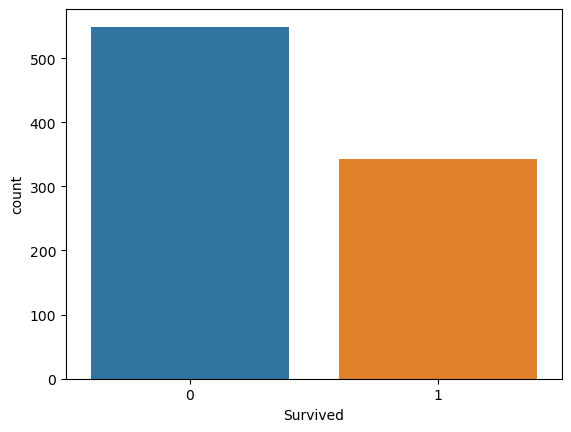

In [4]:

sns.countplot(x='Survived', data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

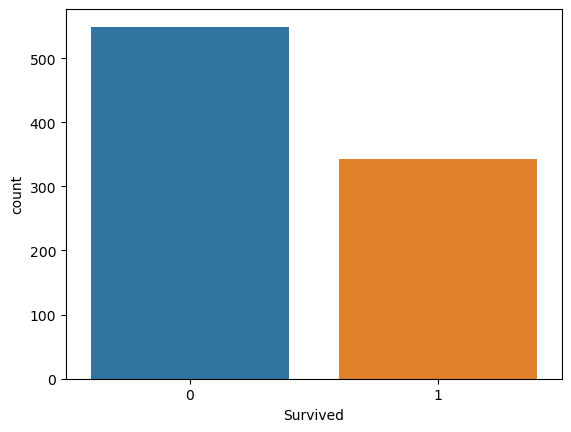

In [5]:
sns.countplot(x='Survived', data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

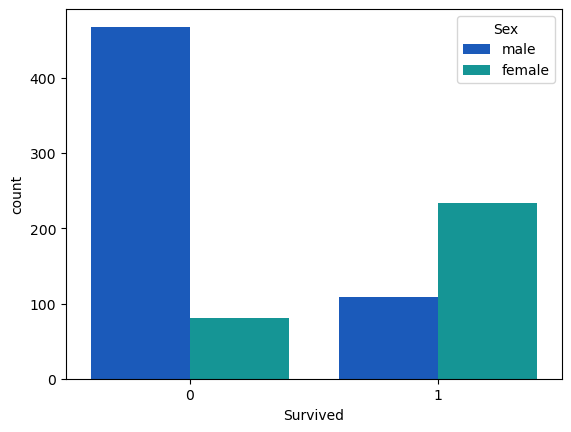

In [6]:
sns.countplot(x='Survived', hue='Sex', data=titanic, palette='winter')

In [7]:
#Analysis: 0 represents not survived and 1 is for survives.
#women are thrice more lokely to survived than males.
#women count of not_survied is less where male count is large.

<AxesSubplot:xlabel='Survived', ylabel='count'>

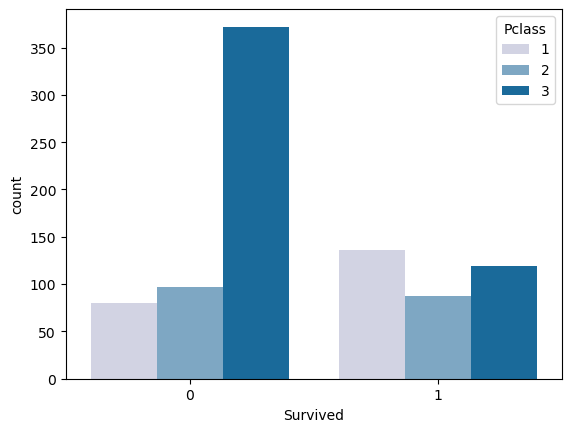

In [7]:
sns.countplot(x='Survived', hue='Pclass', data=titanic, palette='PuBu')

In [9]:
#Analysis: the passengers who did not survived belong to the 3rd class.
#1st class passengers are more likely to survive.

<AxesSubplot:ylabel='Frequency'>

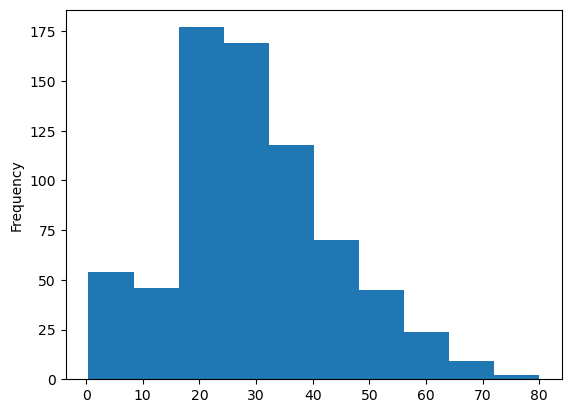

In [8]:
titanic['Age'].plot.hist()


In [11]:
#We notice that highest age group travelling are among the young age between 20-40.
#Very few passengers in age group 70-80.

<AxesSubplot:ylabel='Frequency'>

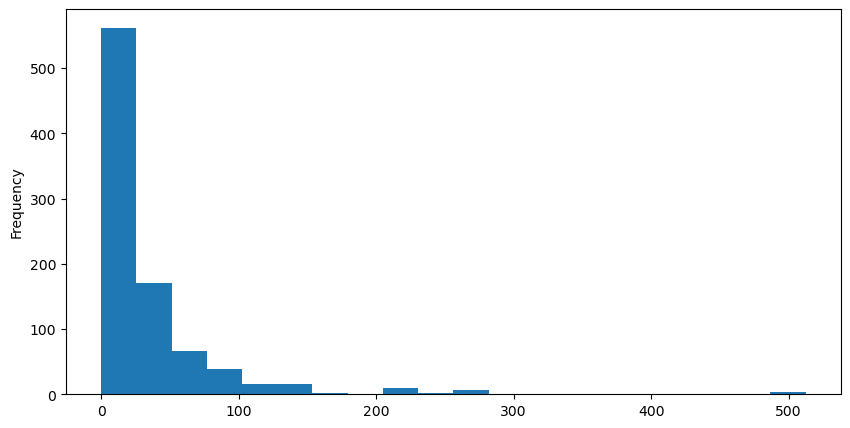

In [9]:
titanic['Fare'].plot.hist(bins=20,figsize=(10,5))

In [13]:
#We observed that the most of the tickets are brought under fare 100.
#and the very few on the highest side of fare ie 220-500 range.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

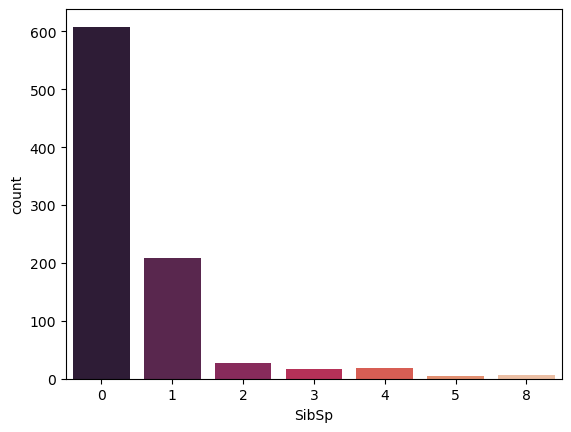

In [10]:
sns.countplot(x='SibSp', data=titanic, palette='rocket')

In [15]:

#We notice that most of the passengers do not have their sibling aboard. They are travelled indivisually.

<AxesSubplot:ylabel='Frequency'>

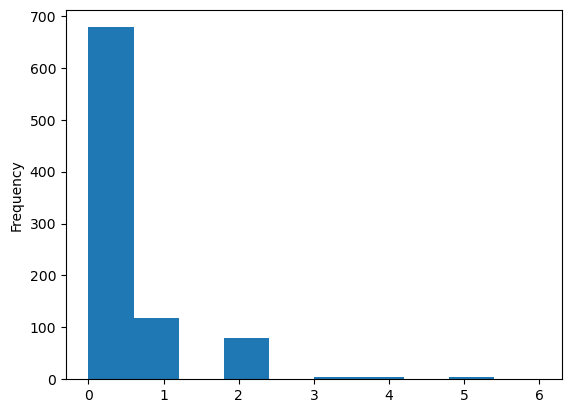

In [11]:
titanic['Parch'].plot.hist()


<AxesSubplot:xlabel='Parch', ylabel='count'>

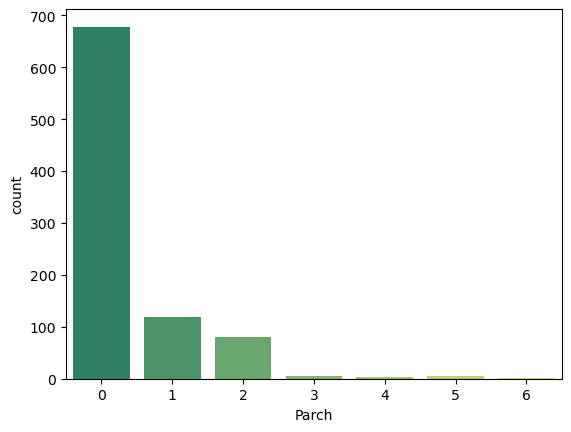

In [12]:
sns.countplot(x='Parch', data=titanic, palette='summer')

# Data Wrangling

In [18]:
#dropping unwanted columns, adding new ones if needed.
#Data wrangling means cleaning the data, removing the null values,
#dropping unwanted columns, adding new ones if needed.

In [13]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
#Age and Cabin has most null values and Embarked has 2 null values.
#We can plot it on heat map.

<AxesSubplot:>

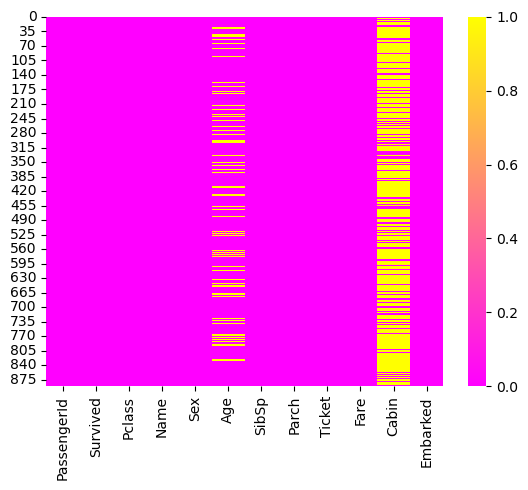

In [15]:
sns.heatmap(titanic.isnull(), cmap='spring')

In [23]:
#Here yellow color is showing the null values, highest in the cabin followed by age.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

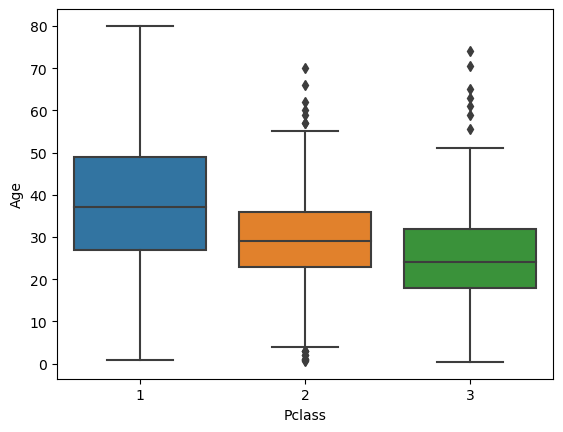

In [16]:
sns.boxplot(x='Pclass', y='Age', data=titanic)

In [25]:
#Above we can see that class 2 and class 3 have many outliers that mean they dont travelled any specific classes.
#We can obserbed that older age group are travelling more in class 1 and 2 compared to class 3.

In [26]:
#The hue parameter determines which column in the dataframe should be used for color encoding.

In [27]:
#We will drop a few columns now.

In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
titanic.drop('Cabin', axis=1, inplace=True)

In [30]:
titanic.head() #dropped the cabin column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
titanic.dropna(inplace=True) #Here we also drop the null values

<AxesSubplot:>

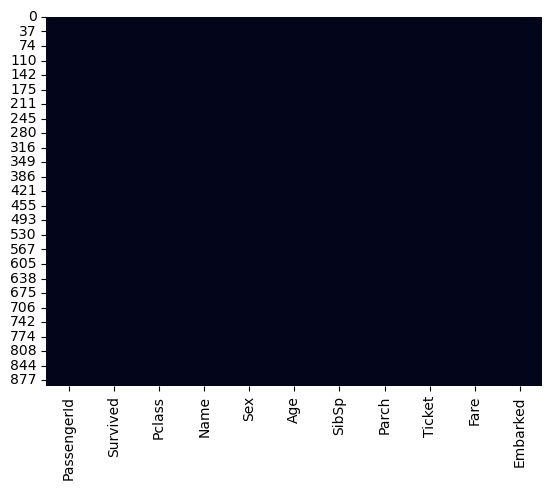

In [32]:
sns.heatmap(titanic.isnull(), cbar=False) #So to see any null value is present or not using heatmap.

In [33]:
#This shows that we dont have any null values. We can also check it:

In [19]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [20]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [36]:
#We will convert the few columns (Strings) into categorical data to apply logistic regression.
#Beacause ML model doest understand nominal means string data(sex, embarked), so we will convert them into numerical.

# One-Hot Encoding

In [37]:
#One-Hot Encoding - simply creates one column for every possible value and put 1 in every appropriate column

In [21]:
pd.get_dummies(titanic['Sex']).head()

,female,male
1,1,0
3,1,0
6,0,1
10,1,0
11,1,0


In [39]:
#where the rows(male and female) converted into separate column.
#But the disadvantage is that it gives many rows.

In [22]:
sex = pd.get_dummies(titanic['Sex'], drop_first = True)
sex.head(3)

,male
1,0
3,0
6,1


In [41]:
#We have drop the first column because only one column is sufficient to determine.
#The gender of the passenger either will be male(1) or not(0), that mean a female.

In [42]:
#Same for Embarked.

In [43]:
embark = pd.get_dummies(titanic['Embarked'])

In [44]:
embark.head(3)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1


In [45]:
#C stands for Cherbourg, Q for Quuenstown, S for Southhampton.
#We can drop any one of the column, as we can infer from the two columns itself.

In [46]:
embark = pd.get_dummies(titanic['Embarked'], drop_first=True)

In [47]:
embark.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [48]:
#if both values are 0 passanger is travelling in first class.

In [49]:
pc = pd.get_dummies(titanic['Pclass'], drop_first = True)
pc.head(3)

,2,3
0,0,1
1,0,0
2,0,1


In [50]:
#Our data is now converted into categorical data
#So we have to concatenate all separatelly created values into one.

In [51]:
titanic = pd.concat([titanic, sex, embark, pc], axis=1)

In [52]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1


In [53]:
#deleting unwanted column

In [54]:
titanic.drop(['Name','PassengerId','Pclass','Ticket','Sex','Embarked'],axis=1,inplace = True)

In [55]:
titanic.head(3)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1


# Train Data

In [56]:
X = titanic.drop('Survived', axis = 1)
Y = titanic['Survived']

In [57]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=2)
print(X.shape, X_train.shape,X_test.shape)

(712, 9) (477, 9) (235, 9)


# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [92]:
X_train.columns = X_train.columns.astype(str)

In [95]:
X_test.columns = X_test.columns.astype(str)

In [96]:
lm.fit(X_train, Y_train)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
prediction = lm.predict(X_test)

In [99]:
from sklearn.metrics import classification_report

In [100]:
from sklearn.metrics import classification_report

In [101]:
from sklearn.metrics import confusion_matrix

In [102]:
confusion_matrix(Y_test, prediction)

array([[118,  26],
       [ 27,  64]], dtype=int64)

In [104]:
from sklearn.metrics import accuracy_score

In [105]:
accuracy_score(Y_test,prediction)

0.774468085106383

In [ ]:
#You have the accuracy of 79% which is quite good and the model can predict the data quite acuurately.
#link to download dataset
#https://www.kaggle.com/competitions/titanic/data